In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Encode
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [84]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

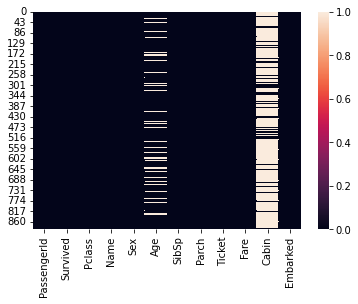

In [89]:
sns.heatmap(df.isnull())

In [90]:
# Droping Irrivalent column
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [91]:
# EDA
## Bar plot

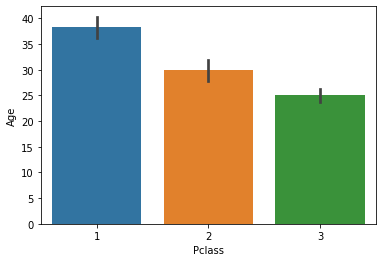

In [92]:
sns.barplot(x='Pclass',y='Age',data=df)

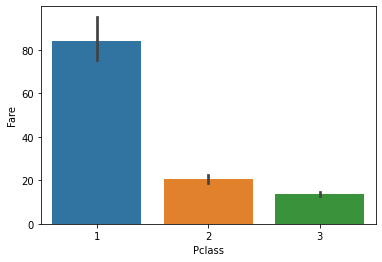

In [93]:
sns.barplot(x='Pclass',y='Fare',data=df)

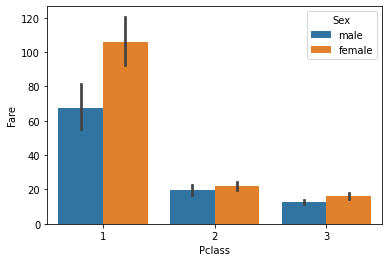

In [94]:
sns.barplot(x='Pclass',y='Fare',data=df,hue='Sex')

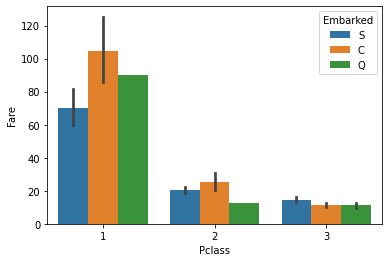

In [95]:
sns.barplot(x='Pclass',y='Fare',data=df,hue='Embarked')

In [96]:
# Box Plot (Numerical - Categorical)

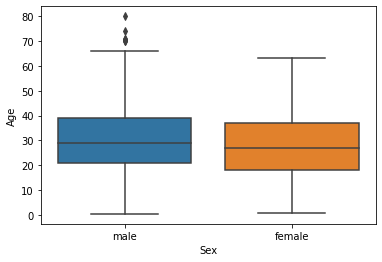

In [97]:
sns.boxplot(x='Sex',y="Age",data=df)

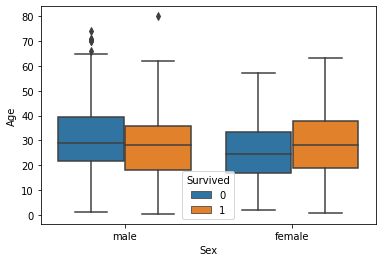

In [98]:
sns.boxplot(x='Sex',y="Age",hue='Survived',data=df)

In [99]:
# Distplot (Numerical - Categorical)

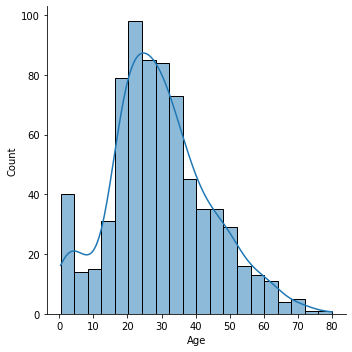

In [100]:
sns.displot(x='Age',data=df,kde=True)

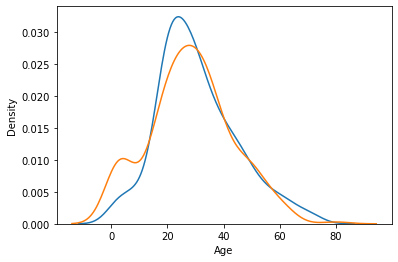

In [101]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['Survived']==0]['Age'],ax=ax)
sns.kdeplot(df[df['Survived']==1]['Age'],ax=ax)
plt.show()

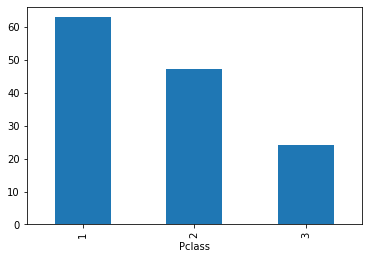

In [102]:
(df.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

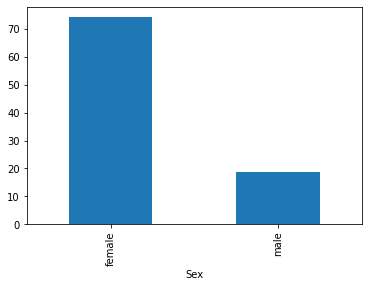

In [103]:
(df.groupby('Sex')['Survived'].mean()*100).plot(kind='bar')

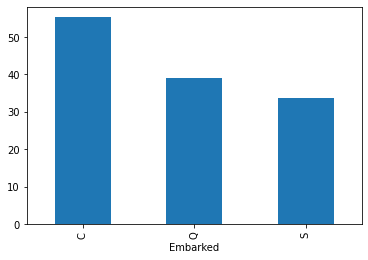

In [104]:
(df.groupby('Embarked')['Survived'].mean()*100).plot(kind='bar')

In [105]:
# ClusterMap (Categorical - categorical)

In [106]:
pd.crosstab(df.SibSp,df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


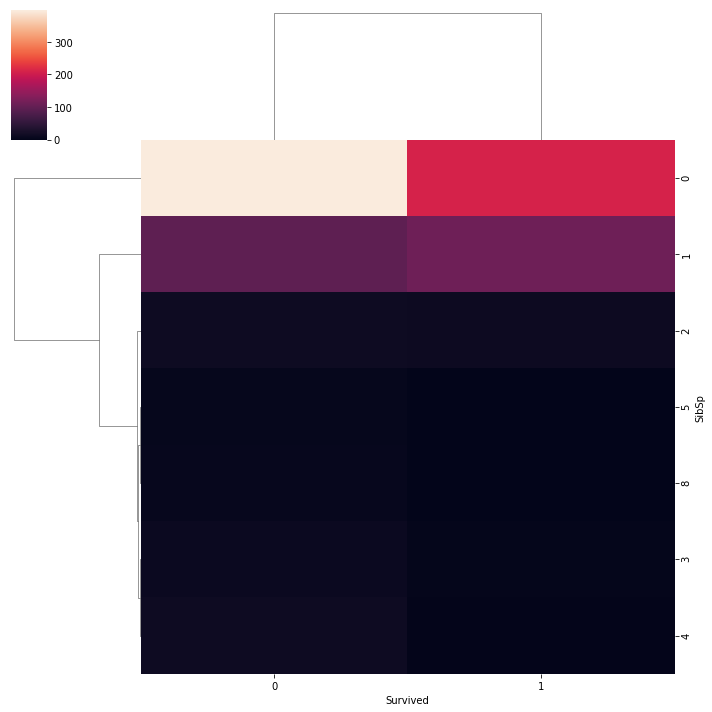

In [107]:
sns.clustermap(pd.crosstab(df.SibSp,df.Survived))

In [108]:
pd.crosstab(df.Parch,df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [109]:
# Pair plot

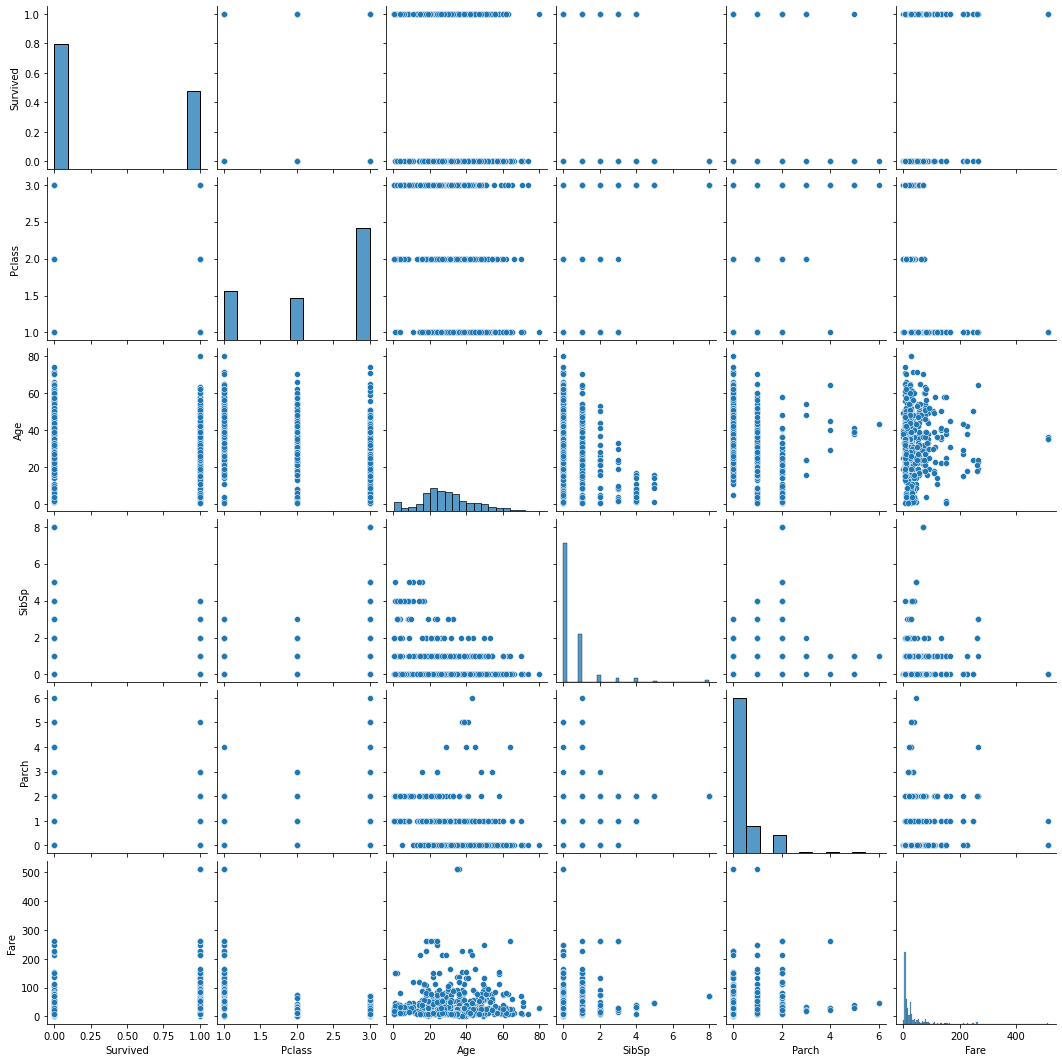

In [110]:
sns.pairplot(df)

In [111]:
# Feature Selection

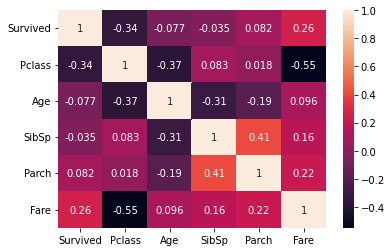

In [112]:
sns.heatmap(df.corr(),annot=True)

In [113]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [114]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df.drop(['Sex','Embarked','Age'],axis=1))

,variables,VIF
0,Survived,1.597881
1,Pclass,1.562380
2,SibSp,1.527858
3,Parch,1.540642
4,Fare,1.506770


In [115]:
# imputation transformer

tnf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [116]:
# one hot encoding
tnf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [117]:
# Scaling
tnf3 = ColumnTransformer([('scale',MinMaxScaler(),slice(0,10))])

In [118]:
# Feature Selection

tnf4 = SelectKBest(score_func=chi2,k=5)

In [119]:
# model 

tnf5 = DecisionTreeClassifier(max_depth=5)

In [163]:
# Display Pipeline

# from sklearn import set_config
# set_config(display='diagram')

In [164]:
# make_pipeline

pipe = make_pipeline(tnf1,tnf2,tnf3,tnf4,tnf5)

In [165]:
# train
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7f80470e78b0>)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

In [123]:
# Code here
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'columntransformer-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'columntransformer-3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'selectkbest': SelectKBest(k=5, score_func=<function chi2 at 0x7f80470e78b0>),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5)}

In [124]:
pipe.named_steps['columntransformer-1'].transformers_[0][1].statistics_

array([29.49884615])

In [125]:
pipe.named_steps['columntransformer-1'].transformers_[1][1].statistics_

array(['S'], dtype=object)

In [126]:
# Predict
y_pred = pipe.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [128]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X_train,y_train,cv=5,scoring='accuracy').mean()

0.6391214419383433

In [129]:
# Gridsearchcv

params = {
    'decisiontreeclassifier__splitter':['best','random'],
    'decisiontreeclassifier__max_depth':[2,3,5,7,8,None],
    'decisiontreeclassifier__criterion':['gini','entrpy','log_loss'],
    'decisiontreeclassifier__max_features':[0.25,0.5,0.75,1],
    'decisiontreeclassifier__min_samples_split':[0.25,0.5,0.75,1],
    'decisiontreeclassifier__max_leaf_nodes':[10,15,20,25]
}

In [130]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=10, scoring="accuracy")
grid.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
17280 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer-1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('columntransformer-2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unkn...
             param_grid={'decisiontreeclassifier__criterion': ['gini', 'entrpy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [2, 3, 5, 7, 8,
                                                               None],
                         'decisiontreeclassifier__max_features': [0.25, 0.5,
                                                                  0.75, 1],
                         'decisiontreeclassifier__max_leaf_nodes': [10, 15, 20,
                                                                    25],
                         'decisiontreeclassifier__min_samples_split': [0.25,
                                                                       0.5,
                                                                       0.75,
                                                                       1],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             scoring='accuracy')

In [131]:
grid.best_score_

0.6447183098591549

In [132]:
grid.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 0.75,
 'decisiontreeclassifier__max_leaf_nodes': 15,
 'decisiontreeclassifier__min_samples_split': 0.75,
 'decisiontreeclassifier__splitter': 'best'}

In [133]:
model = grid.best_estimator_

In [134]:
y_pred = model.predict(X_test)

In [135]:
accuracy_score(y_test,y_pred)

0.6256983240223464

In [136]:
cross_val_score(model, X_train,y_train,cv=10,scoring='accuracy').mean()

0.6278364632237873

In [137]:
# Exporting pipeline

import pickle
pickle.dump(model,open('pipe_decisiontree.pkl','wb'))

In [138]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

[Text(0.75, 0.9166666666666666, 'X[0] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.625, 0.75, 'X[2] <= 0.5\ngini = 0.449\nsamples = 587\nvalue = [387, 200]'),
 Text(0.5, 0.5833333333333334, 'X[4] <= 0.5\ngini = 0.453\nsamples = 574\nvalue = [375, 199]'),
 Text(0.375, 0.4166666666666667, 'X[3] <= 0.5\ngini = 0.454\nsamples = 572\nvalue = [373, 199]'),
 Text(0.25, 0.25, 'X[1] <= 0.5\ngini = 0.454\nsamples = 571\nvalue = [372, 199]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.464\nsamples = 60\nvalue = [38, 22]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.453\nsamples = 511\nvalue = [334, 177]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5833333333333334, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.875, 0.75, 'gini = 0.496\nsamples = 125\nvalue = [57, 68]')]

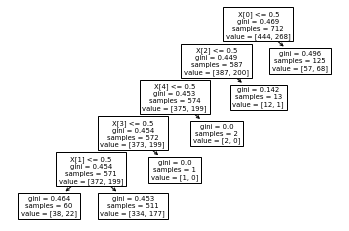

In [140]:
from sklearn.tree import plot_tree
plot_tree(pipe.named_steps['decisiontreeclassifier'])